## Neural Networks


In [ ]:
import pandas as pd
from keras.models import Sequential
import matplotlib.pyplot as plt
from numpy import matlib as mb

In [1048]:
# Load training data
meta = pd.read_csv('data/training_set_metadata.csv', delimiter=",")
Y = pd.read_csv('data/Y.csv')
X = pd.read_csv('data/X.csv')
X_feat = pd.read_csv('data/X_feat.csv',index_col = 0)
X_train = pd.read_csv('data/X_train.csv', index_col = 0)
X_test = pd.read_csv('data/X_test.csv', index_col = 0)
Ym = pd.read_csv('data/Ym.csv')

In [1050]:
#Make a list of the unique classes in meta dataset
classes = list(meta['target'].unique())

# Convert Y to a vector of length(classes)
Y = np.zeros((len(Ym), len(classes)))
Ym_array = np.array(Ym)
#set index number of vector that corresponds to class number to value of 1 if the object corresponds to that class
for i in range(len(Ym_array)):
    Y[i, Ym_array[i]] = 1.0

In [604]:
#split training set into training and test set, 70-30 split
from sklearn.model_selection import train_test_split

shift = np.mean(np.array(X_train), axis=0)
scale = np.std(np.array(X_train), axis=0)
X_train = (X_train - shift)/scale
X_test = (X_test - shift)/scale

X_train, X_test, ym_train, ym_test = train_test_split(X_feat, Y, test_size=0.3, random_state=0)

In [334]:
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras import backend as K

In [464]:
# Construct neural networks model 
# Number of hidden layers 
# Number of neurons (units) in each hidden layer 
# Number of epochs
# Learning rate (values in range of 1e-5 to 1e-2) 
# Dropout level (no higher than 0.5) 
# decay_rate (rate of decay for learning rate, no lower than 0.5)
num_hidden_units = [256, 256, 128]
num_epochs = 500
lr = 0.001
dropout_rate = 0.3
decay_rate = 0.7

model = Sequential()
for i in range(len(num_hidden_units)):
    if i == 0:
        model.add(Dense(units=num_hidden_units[i], activation='relu', input_dim=25))
    else:
        model.add(Dense(units=num_hidden_units[i], activation='relu', input_dim=num_hidden_units[i-1]))
    model.add(Dropout(dropout_rate, input_shape=(num_hidden_units[i],)))
model.add(Dense(units=14, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=lr),
              metrics=['accuracy'])

In [465]:
#variables to hold the loss and accuracy data of each epoch
train_loss = np.zeros(num_epochs)
test_loss = np.zeros(num_epochs)
train_acc = np.zeros(num_epochs)
test_acc = np.zeros(num_epochs)
for e in range(num_epochs):
    print('epoch', e)
    if e % 100 == 0 and e > 0:
        lr *= decay_rate
        K.set_value(model.optimizer.lr, lr)
    model.fit(X_train, ym_train, epochs=1, batch_size=128)
    loss_and_metrics = model.evaluate(X_train, ym_train, batch_size=128)
    train_loss[e] = loss_and_metrics[0]
    train_acc[e] = loss_and_metrics[1]
    loss_and_metrics = model.evaluate(X_test, ym_test, batch_size=128)
    test_loss[e] = loss_and_metrics[0]
    test_acc[e] = loss_and_metrics[1]

epoch 0
Epoch 1/1
2355/2355 [==============================] - 0s 38us/step
epoch 1
Epoch 1/1
2355/2355 [==============================] - 0s 44us/step
epoch 2
Epoch 1/1
2355/2355 [==============================] - 0s 54us/step
epoch 3
Epoch 1/1
2355/2355 [==============================] - 0s 50us/step
epoch 4
Epoch 1/1
2355/2355 [==============================] - 0s 53us/step
epoch 5
Epoch 1/1
2355/2355 [==============================] - 0s 41us/step
epoch 6
Epoch 1/1
2355/2355 [==============================] - 0s 45us/step
epoch 7
Epoch 1/1
2355/2355 [==============================] - 0s 45us/step
epoch 8
Epoch 1/1
2355/2355 [==============================] - 0s 40us/step
epoch 9
Epoch 1/1
2355/2355 [==============================] - 0s 40us/step
epoch 10
Epoch 1/1
2355/2355 [==============================] - 0s 40us/step
epoch 11
Epoch 1/1
2355/2355 [==============================] - 0s 46us/step
epoch 12
Epoch 1/1
2355/2355 [==============================] - 0s 41us/step
epoch 13


2355/2355 [==============================] - 0s 64us/step
epoch 74
Epoch 1/1
2355/2355 [==============================] - ETA:  - 0s 41us/step
epoch 75
Epoch 1/1
2355/2355 [==============================] - 0s 46us/step
epoch 76
Epoch 1/1
2355/2355 [==============================] - 0s 43us/step
epoch 77
Epoch 1/1
2355/2355 [==============================] - 0s 44us/step
epoch 78
Epoch 1/1
2355/2355 [==============================] - 0s 43us/step
epoch 79
Epoch 1/1
2355/2355 [==============================] - 0s 45us/step
epoch 80
Epoch 1/1
2355/2355 [==============================] - 0s 46us/step
epoch 81
Epoch 1/1
2355/2355 [==============================] - 0s 40us/step
epoch 82
Epoch 1/1
2355/2355 [==============================] - 0s 52us/step
epoch 83
Epoch 1/1
2355/2355 [==============================] - 0s 41us/step
epoch 84
Epoch 1/1
2355/2355 [==============================] - 0s 41us/step
epoch 85
Epoch 1/1
2355/2355 [==============================] - 0s 40us/step
epoch 86
E

2355/2355 [==============================] - 0s 38us/step
epoch 147
Epoch 1/1
2355/2355 [==============================] - 0s 44us/step
epoch 148
Epoch 1/1
2355/2355 [==============================] - 0s 40us/step
epoch 149
Epoch 1/1
2355/2355 [==============================] - 0s 40us/step
epoch 150
Epoch 1/1
2355/2355 [==============================] - 0s 46us/step
epoch 151
Epoch 1/1
2355/2355 [==============================] - 0s 52us/step
epoch 152
Epoch 1/1
2355/2355 [==============================] - 0s 42us/step
epoch 153
Epoch 1/1
2355/2355 [==============================] - 0s 42us/step
epoch 154
Epoch 1/1
2355/2355 [==============================] - 0s 41us/step
epoch 155
Epoch 1/1
2355/2355 [==============================] - 0s 46us/step
epoch 156
Epoch 1/1
2355/2355 [==============================] - 0s 43us/step
epoch 157
Epoch 1/1
2355/2355 [==============================] - 0s 46us/step
epoch 158
Epoch 1/1
2355/2355 [==============================] - 0s 46us/step
epoch 

2355/2355 [==============================] - 0s 59us/step
epoch 184
Epoch 1/1
2355/2355 [==============================] - 0s 46us/step
epoch 185
Epoch 1/1
2355/2355 [==============================] - 0s 45us/step
epoch 186
Epoch 1/1
2355/2355 [==============================] - 0s 40us/step
epoch 187
Epoch 1/1
2355/2355 [==============================] - 0s 39us/step
epoch 188
Epoch 1/1
2355/2355 [==============================] - 0s 47us/step
epoch 189
Epoch 1/1
2355/2355 [==============================] - 0s 43us/step
epoch 190
Epoch 1/1
2355/2355 [==============================] - 0s 40us/step
epoch 191
Epoch 1/1
2355/2355 [==============================] - 0s 40us/step
epoch 192
Epoch 1/1
2355/2355 [==============================] - 0s 42us/step
epoch 193
Epoch 1/1
2355/2355 [==============================] - 0s 39us/step
epoch 194
Epoch 1/1
2355/2355 [==============================] - 0s 44us/step
epoch 195
Epoch 1/1
2355/2355 [==============================] - 0s 45us/step
epoch 

2355/2355 [==============================] - 0s 44us/step
epoch 257
Epoch 1/1
2355/2355 [==============================] - 0s 40us/step
epoch 258
Epoch 1/1
2355/2355 [==============================] - 0s 47us/step
epoch 259
Epoch 1/1
2355/2355 [==============================] - 0s 40us/step
epoch 260
Epoch 1/1
2355/2355 [==============================] - 0s 48us/step
epoch 261
Epoch 1/1
2355/2355 [==============================] - 0s 45us/step
epoch 262
Epoch 1/1
2355/2355 [==============================] - 0s 42us/step
epoch 263
Epoch 1/1
2355/2355 [==============================] - 0s 43us/step
epoch 264
Epoch 1/1
2355/2355 [==============================] - 0s 47us/step
epoch 265
Epoch 1/1
2355/2355 [==============================] - 0s 46us/step
epoch 266
Epoch 1/1
2355/2355 [==============================] - 0s 39us/step
epoch 267
Epoch 1/1
2355/2355 [==============================] - 0s 37us/step
epoch 268
Epoch 1/1
2355/2355 [==============================] - 0s 37us/step
epoch 

2355/2355 [==============================] - 0s 43us/step
epoch 330
Epoch 1/1
2355/2355 [==============================] - 0s 45us/step
epoch 331
Epoch 1/1
2355/2355 [==============================] - 0s 46us/step
epoch 332
Epoch 1/1
2355/2355 [==============================] - 0s 39us/step
epoch 333
Epoch 1/1
2355/2355 [==============================] - 0s 53us/step
epoch 334
Epoch 1/1
2355/2355 [==============================] - 0s 61us/step
epoch 335
Epoch 1/1
2355/2355 [==============================] - 0s 47us/step
epoch 336
Epoch 1/1
2355/2355 [==============================] - 0s 77us/step
epoch 337
Epoch 1/1
2355/2355 [==============================] - 0s 67us/step
epoch 338
Epoch 1/1
2355/2355 [==============================] - 0s 56us/step
epoch 339
Epoch 1/1
2355/2355 [==============================] - 0s 37us/step
epoch 340
Epoch 1/1
2355/2355 [==============================] - 0s 37us/step
epoch 341
Epoch 1/1
2355/2355 [==============================] - 0s 37us/step
epoch 

2355/2355 [==============================] - 0s 36us/step
epoch 403
Epoch 1/1
2355/2355 [==============================] - 0s 36us/step
epoch 404
Epoch 1/1
2355/2355 [==============================] - 0s 38us/step
epoch 405
Epoch 1/1
2355/2355 [==============================] - 0s 38us/step
epoch 406
Epoch 1/1
2355/2355 [==============================] - 0s 39us/step
epoch 407
Epoch 1/1
2355/2355 [==============================] - 0s 37us/step
epoch 408
Epoch 1/1
2355/2355 [==============================] - 0s 37us/step
epoch 409
Epoch 1/1
2355/2355 [==============================] - 0s 36us/step
epoch 410
Epoch 1/1
2355/2355 [==============================] - 0s 38us/step
epoch 411
Epoch 1/1
2355/2355 [==============================] - 0s 39us/step
epoch 412
Epoch 1/1
2355/2355 [==============================] - 0s 37us/step
epoch 413
Epoch 1/1
2355/2355 [==============================] - 0s 38us/step
epoch 414
Epoch 1/1
2355/2355 [==============================] - 0s 37us/step
epoch 

2355/2355 [==============================] - 0s 37us/step
epoch 440
Epoch 1/1
2355/2355 [==============================] - 0s 37us/step
epoch 441
Epoch 1/1
2355/2355 [==============================] - 0s 37us/step
epoch 442
Epoch 1/1
2355/2355 [==============================] - 0s 36us/step
epoch 443
Epoch 1/1
2355/2355 [==============================] - 0s 37us/step
epoch 444
Epoch 1/1
2355/2355 [==============================] - 0s 37us/step
epoch 445
Epoch 1/1
2355/2355 [==============================] - 0s 38us/step
epoch 446
Epoch 1/1
2355/2355 [==============================] - 0s 37us/step
epoch 447
Epoch 1/1
2355/2355 [==============================] - 0s 37us/step
epoch 448
Epoch 1/1
2355/2355 [==============================] - 0s 38us/step
epoch 449
Epoch 1/1
2355/2355 [==============================] - 0s 37us/step
epoch 450
Epoch 1/1
2355/2355 [==============================] - 0s 37us/step
epoch 451
Epoch 1/1
2355/2355 [==============================] - 0s 37us/step
epoch 

In [1045]:
#Maximum prediction accuracy reached
test_acc.max()

0.6891719748260109

In [467]:
#Minimum loss value reached
test_loss.min()

1.0296002424952837

In [832]:
#Save this model to avoid having to rerun and lose our results
model.save("model.h5")
print("Saved model to disk")


Saved model to disk


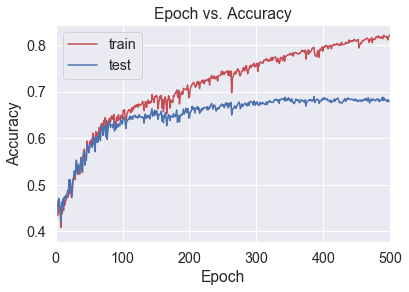

In [1041]:
#plot line graph of the predictin accuracy over the epochs for train and test results
from matplotlib import pyplot as plt
plt.plot(range(num_epochs), train_acc, label='train', color = 'r')
plt.plot(range(num_epochs), test_acc, label='test', color = 'b')
plt.xlim([0, num_epochs])
plt.title('Epoch vs. Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

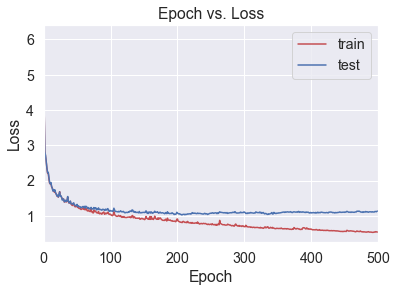

In [1037]:
#plot line graph of the loss values over the epochs for training and test results
plt.plot(range(num_epochs), train_loss, label='train', color = 'r')
plt.plot(range(num_epochs), test_loss, label='test', color = 'b')
plt.xlim([0, num_epochs])
plt.title('Epoch vs. Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [1056]:
model_output = model.get_layer('dense_325').output
m = Model(inputs=model.input, outputs=model_output)
m

In [629]:
#Set the maximum prediction values to 1 and the rest to 0 
#This is in order to find the corresponding class number, based on the index placement 1 is on 
yn_pred = np.zeros_like(preds)
yn_pred[np.arange(len(preds)), preds.argmax(1)] = 1

In [634]:
#Pair classes with constructed number
classes = meta['target'].unique()
assign = {classes[i]: i for i in range(len(classes))}
assign

{92: 0,
 88: 1,
 42: 2,
 90: 3,
 65: 4,
 16: 5,
 67: 6,
 95: 7,
 62: 8,
 15: 9,
 52: 10,
 6: 11,
 64: 12,
 53: 13}

In [865]:
#translate OHE with paired class
yn_class = []
for i in range(len(yn_pred)):
    for o in range(14):
        if yn_pred[i][o] == 1:
            yn_class.append(classes[o])
yt_class = []
for i in range(len(ym_test)):
    for o in range(14):
        if ym_test[i][o] == 1:
            yt_class.append(classes[o])
            
#translate class to constructed number
yn_class_num = []
yt_class_num = []
for i in range(len(yn_class)): 
    yn_class_num += [assign[yn_class[i]]]
for i in range(len(yt_class)): 
    yt_class_num += [assign[yt_class[i]]]

In [866]:
#Update variables
yn_class = yn_class_num
yt_class = yt_class_num

In [867]:
#Obtain the top 5 predictions for each object
best_5 = np.argsort(preds, axis=1)[:,-5:].tolist()
for i in range(len(best_5)):
    best_5[i].reverse()
t5_array = np.array(best_5)

ytest_array = np.array(yt_class)
frac_1 = sum(t5_array[:, 0] == ytest_array)/len(ytest_array)
frac_correct = sum(t5_array[:, 0] == ytest_array)/len(ytest_array)
print('frac in top ' + str(1) + ': ' + str(frac_correct))
frac = []
frac.append(frac_1)
for i in range(2, 6):
    true_class = mb.repmat(ytest_array, i, 1).T
    frac_correct = np.sum(t5_array[:, :i] == true_class)/len(ytest_array)
    print('frac in top ' + str(i) + ': ' + str(frac_correct))
    frac.append(frac_correct)

(14.0, 0.0)

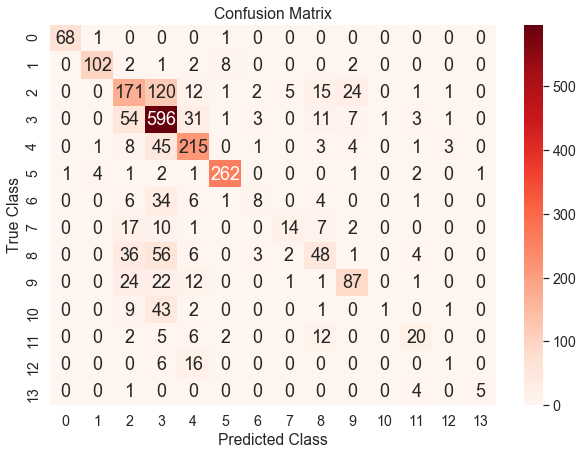

In [1044]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set()
cm = sklearn.metrics.confusion_matrix(yt_class, yn_class)
#Create a confusion matrix for the test results of the neural network model
sns.set(font_scale=1.3)
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", linewidths=0, ax = ax, cmap= 'Reds', annot_kws={"size": 18})

ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.set_ylim(len(classes)-.0,.0)
